In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, util, filters, metrics
import cv2
from prettytable import PrettyTable 

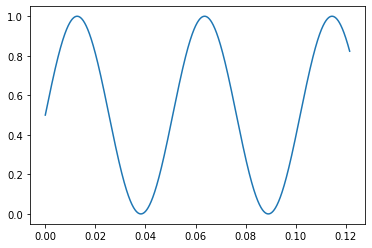

Период дискретизации: 0.0081
Частота дискретизации: 123.5


In [2]:
width = 48.8
resolution = 6000

# Период дискретизации
delta = round((width / resolution), 4) 

# Частота дискретизации
sampling_rate = round(1 / delta, 1)

coef = 1
frequency = sampling_rate
phase= 0

# Число пикселей в линейке регистрирующей среды -> выходной размер изображения
n_px = 15

# Значения по x
x = np.arange(0, delta * n_px, delta / 100) 
y = 0.5 + 0.5 * np.sin(frequency * x + phase) 

fig = plt.subplots()
plt.plot(x, y)

plt.show()

print (f"Период дискретизации: {delta}")
print (f"Частота дискретизации: {sampling_rate}")

In [9]:
def function(x):
    return 0.5 + 0.5 * np.sin(frequency * x + phase)
    # return np.sin(2*np.pi*frequency*x+phase*np.pi)/2+0.5

counts_num = 50

# Функция дискретизации 
def sampling(s_frequancy):
    out = []
    x = 0
    while x < counts_num:
        y = function(x)
        y1 = function(x + s_frequancy)
        out.append(round((y + y1) / 2, 2))
        x += s_frequancy
    return np.array(out)

In [10]:
# Преобразование дискретных значений в изображение
def image(row): 
    row = np.around(255 * row)
    image = np.full((row.size, row.size), row)
    return image

<Figure size 432x288 with 0 Axes>

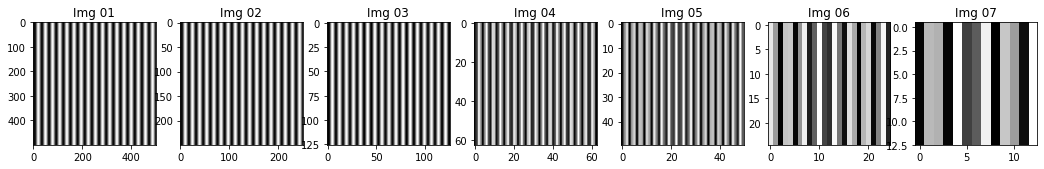

In [12]:
img_1 = image(sampling(0.1))
img_2 = image(sampling(0.2))
img_3 = image(sampling(0.4))
img_4 = image(sampling(0.8))
img_5 = image(sampling(1))
img_6 = image(sampling(2))
img_7 = image(sampling(4))

fig = plt.figure()

fig, ([ax1, ax2, ax3, ax4, ax5, ax6,ax7] ) = plt.subplots(
    nrows=1, ncols=7,
    figsize=(18, 14)
)

ax1.set_title('Img 01')
ax2.set_title('Img 02')
ax3.set_title('Img 03')
ax4.set_title('Img 04')
ax5.set_title('Img 05')
ax6.set_title('Img 06')
ax7.set_title('Img 07')


ax1.imshow(img_1, cmap='gray')
ax2.imshow(img_2, cmap='gray')
ax3.imshow(img_3, cmap='gray')
ax4.imshow(img_4,cmap='gray')
ax5.imshow(img_5, cmap='gray')
ax6.imshow(img_6, cmap='gray')
ax7.imshow(img_7,cmap='gray')

In [13]:
# Изменение размера - интерполяция методом ближайшего соседа
def interpolation(img, size):
    out = cv2.resize(img, size, cv2.INTER_NEAREST)
    return out

<Figure size 432x288 with 0 Axes>

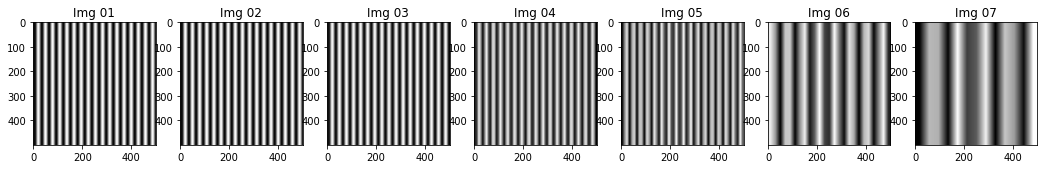

In [14]:
img_1_intr = interpolation(img_1, img_1.shape)
img_2_intr = interpolation(img_2, img_1.shape)
img_3_intr = interpolation(img_3, img_1.shape)
img_4_intr = interpolation(img_4, img_1.shape)
img_5_intr = interpolation(img_5, img_1.shape)
img_6_intr = interpolation(img_6, img_1.shape)
img_7_intr = interpolation(img_7, img_1.shape)

fig = plt.figure()

fig, ([ax1, ax2, ax3, ax4, ax5, ax6,ax7] ) = plt.subplots(
    nrows=1, ncols=7,
    figsize=(18, 14)
)

ax1.set_title('Img 01')
ax2.set_title('Img 02')
ax3.set_title('Img 03')
ax4.set_title('Img 04')
ax5.set_title('Img 05')
ax6.set_title('Img 06')
ax7.set_title('Img 07')


ax1.imshow(img_1_intr, cmap='gray')
ax2.imshow(img_2_intr, cmap='gray')
ax3.imshow(img_3_intr, cmap='gray')
ax4.imshow(img_4_intr,cmap='gray')
ax5.imshow(img_5_intr, cmap='gray')
ax6.imshow(img_6_intr, cmap='gray')
ax7.imshow(img_7_intr,cmap='gray')

plt.show()

In [15]:
images = [img_1_intr, img_2_intr, img_3_intr, img_4_intr, img_5_intr, img_6_intr, img_7_intr]

table = PrettyTable()
table.field_names = ["№", "Изображение", "MSE", "PSNR", "SSIM"]

for i in range(len(images)):
    # Расчет показателей
    mse = round(metrics.mean_squared_error(img_1, images[i]) / 255, 3) 
    psnr = round(metrics.peak_signal_noise_ratio(img_1, images[i], data_range=255), 3)
    ssim = round(metrics.structural_similarity(img_1, images[i], channel_axis=True), 3)

    temp = []
    temp.append(i+1)
    temp.append(" " + str(i+1))
    temp.extend((mse, psnr, ssim))
    table.add_row(temp)

print(table)

c:\Users\Dmitr\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\metrics\simple_metrics.py:163: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


+---+-------------+--------+--------+-------+
| № | Изображение |  MSE   |  PSNR  |  SSIM |
+---+-------------+--------+--------+-------+
| 1 |       1     |  0.0   |  inf   |  1.0  |
| 2 |       2     | 0.045  | 37.567 | 0.947 |
| 3 |       3     | 7.147  | 15.524 | 0.824 |
| 4 |       4     | 11.716 | 13.378 | 0.785 |
| 5 |       5     | 15.114 | 12.272 | 0.767 |
| 6 |       6     | 42.762 | 7.755  | 0.667 |
| 7 |       7     | 32.96  | 8.886  | 0.701 |
+---+-------------+--------+--------+-------+
